### Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

### Load Data

In [2]:
data = pd.DataFrame({
    "Name":['C1', 'C2', 'C3', 'NC4', 'NC5', 'C6', 'C7+'],
    "Crit Pres (Psia)":[666.40, 706.50, 616.00, 527.90, 488.60, 453.00, 285.00],
    "Crit Temp (R)":[343.33, 549.92, 666.06, 765.62, 845.80, 923.00, 700.00+460],
    "Acentric Factor":[0.01, 0.10, 0.15, 0.19, 0.23, 0.25, 0.5831],
    "Mol Weight":[16.043, 30.07, 44.097, 58.123, 72.15, 84, 220]
})

### Define Component

In [3]:
name = ['C1', 'C2', 'C3', 'NC4', 'NC5', 'C6', 'C7+']
comp = [0.8, 0.04, 0.03, 0.03, 0.02, 0.01, 0.07]

### Redlich-Kwong EOS

In [4]:
def RKEOS(p_array, t_array, name, comp, data):
    omega_a = 0.42747
    omega_b = 0.08664
    r = 10.732
    mw = []
    pc = []
    tc = []
    om = []
    for i in range (len(name)):
        mw.append(data[data['Name'] == name[i]]['Mol Weight'].values[0])
        pc.append(data[data['Name'] == name[i]]['Crit Pres (Psia)'].values[0])
        tc.append(data[data['Name'] == name[i]]['Crit Temp (R)'].values[0])
        om.append(data[data['Name'] == name[i]]['Acentric Factor'].values[0])
    a = [omega_a*((r**2)*(tc[i]**2.5))/pc[i] for i in range (len(name))]
    b = [omega_b*r*tc[i]/pc[i] for i in range (len(name))]
    a_mix = 0
    b_mix = 0
    for i in range (len(name)):
        a_mix += comp[i]*(a[i]**0.5)
        b_mix += comp[i]*b[i]
    a_mix = a_mix**2
    z_fact = []
    for p in p_array:
        z_fact_p = []
        for t in t_array:
            t += 460
            a_val = a_mix*p/((r**2)*(t**2.5))
            b_val = b_mix*p/(r*t)
            coef = [1, -1, (a_val - b_val - b_val**2), - a_val*b_val]
            roots = np.roots(coef)
            z_fact_p.append(np.max(roots.real))
        z_fact.append(z_fact_p)
    return pd.DataFrame(z_fact, columns=t_array, index=p_array)

### Soave-Redlich-Kwong EOS

In [5]:
def SRKEOS(p_array, t_array, name, comp, data):
    omega_a = 0.42747
    omega_b = 0.08664
    r = 10.732
    mw = []
    pc = []
    tc = []
    om = []
    for i in range (len(name)):
        mw.append(data[data['Name'] == name[i]]['Mol Weight'].values[0])
        pc.append(data[data['Name'] == name[i]]['Crit Pres (Psia)'].values[0])
        tc.append(data[data['Name'] == name[i]]['Crit Temp (R)'].values[0])
        om.append(data[data['Name'] == name[i]]['Acentric Factor'].values[0])
    m = [0.48 + 1.574*om[i] - 0.176*(om[i]**2) for i in range (len(name))]
    a = [omega_a*((r**2)*(tc[i]**2))/pc[i] for i in range (len(name))]
    b = [omega_b*r*tc[i]/pc[i] for i in range (len(name))]
    b_mix = 0
    for i in range (len(name)):
        b_mix += comp[i]*b[i]
    z_fact = []
    for p in p_array:
        z_fact_p = []
        for t in t_array:
            t += 460
            alpha = [(1 + m[i]*(1 - (t/tc[i])**2))**2 for i in range (len(name))]
            a_mix = 0
            for i in range (len(name)):
                for j in range (len(name)):
                    a_mix += comp[i]*comp[j]*((a[i]*a[j]*alpha[i]*alpha[j])**0.5)
            a_val = a_mix*p/((r**2)*(t**2))
            b_val = b_mix*p/(r*t)
            coef = [1, -1, (a_val - b_val - b_val**2), - a_val*b_val]
            roots = np.roots(coef)
            z_fact_p.append(np.max(roots.real))
        z_fact.append(z_fact_p)
    return pd.DataFrame(z_fact, columns=t_array, index=p_array)

### Peng-Robinson EOS

In [6]:
def PREOS(p_array, t_array, name, comp, data):
    omega_a = 0.45724
    omega_b = 0.07780
    r = 10.732
    mw = []
    pc = []
    tc = []
    om = []
    for i in range (len(name)):
        mw.append(data[data['Name'] == name[i]]['Mol Weight'].values[0])
        pc.append(data[data['Name'] == name[i]]['Crit Pres (Psia)'].values[0])
        tc.append(data[data['Name'] == name[i]]['Crit Temp (R)'].values[0])
        om.append(data[data['Name'] == name[i]]['Acentric Factor'].values[0])
    m = [0.3746 + 1.5423*om[i] - 0.2699*(om[i]**2) for i in range (len(name))]
    a = [omega_a*((r**2)*(tc[i]**2))/pc[i] for i in range (len(name))]
    b = [omega_b*r*tc[i]/pc[i] for i in range (len(name))]
    b_mix = 0
    for i in range (len(name)):
        b_mix += comp[i]*b[i]
    z_fact = []
    for p in p_array:
        z_fact_p = []
        for t in t_array:
            t += 460
            alpha = [(1 + m[i]*(1 - (t/tc[i])**2))**2 for i in range (len(name))]
            a_mix = 0
            for i in range (len(name)):
                for j in range (len(name)):
                    a_mix += comp[i]*comp[j]*((a[i]*a[j]*alpha[i]*alpha[j])**0.5)
            a_val = a_mix*p/((r**2)*(t**2))
            b_val = b_mix*p/(r*t)
            coef = [1, b_val-1, (a_val - 3*(b_val**2) -2*b_val), - (a_val*b_val - b_val**2 - b_val**3)]
            roots = np.roots(coef)
            z_fact_p.append(np.max(roots.real))
        z_fact.append(z_fact_p)
    return pd.DataFrame(z_fact, columns=t_array, index=p_array)

### EOS Comparison

In [7]:
p_array = [i for i in range (100, 3000, 100)]
t_array = [i for i in range (100, 300, 50)]

In [8]:
dataframe_list = [RKEOS(p_array, t_array, name, comp, data), SRKEOS(p_array, t_array, name, comp, data), PREOS(p_array, t_array, name, comp, data)]

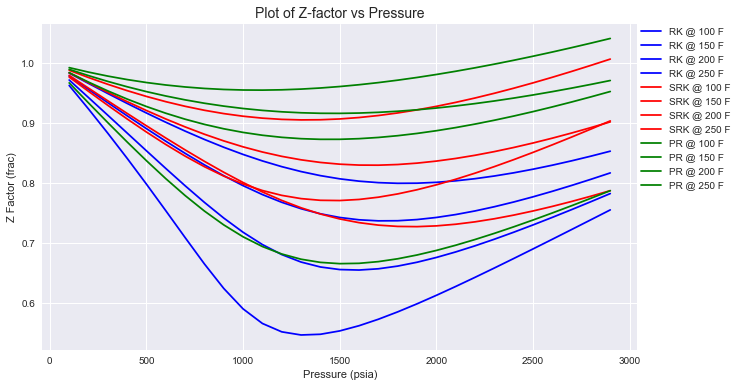

In [9]:
plt.figure(figsize=(16/1.5,9/1.5))
eos_name = ['RK', 'SRK', 'PR']
color_name = ['blue', 'red', 'green']
for i, df in enumerate(dataframe_list):
    for temp in df.columns:
        plt.plot(df.index, df[temp], label=eos_name[i] + " @ " + str(temp) + " F", c=color_name[i])
plt.xlabel("Pressure (psia)")
plt.ylabel("Z Factor (frac)")
plt.title("Plot of Z-factor vs Pressure", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()